# Задача 3.9

Требуется:
1) построить уравнение парной линейной регрессии;
2) вычислить теоретические значения (У) и значения остатков (е,);
3) рассчитать критерий Дарбина-Уотсона и оценить полученный результат на уровне значимости а = 0,05 .

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import spearmanr
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [422]:
df = pd.read_csv("3_9.csv", sep=",")


In [423]:
df = (
    df
    .drop(columns=["№"])
    .rename(
        columns={
            "x (Площадь квартиры м²)": "x",
            "y (Стоимость квартиры тыс. у.е.)": "y"
        }
    )
)

In [424]:
df

,x,y
0,28,27.0
1,29,22.0
2,32,29.0
3,35,27.0
4,40,31.0
5,44,34.0
6,45,39.3
7,51,52.7
8,53,55.4
9,58,57.0


In [425]:
X = sm.add_constant(df["x"])
model = sm.OLS(df["y"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     268.9
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           5.48e-11
Time:                        20:14:04   Log-Likelihood:                -59.427
No. Observations:                  17   AIC:                             122.9
Df Residuals:                      15   BIC:                             124.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.9422      6.202     -5.312      0.0

In [426]:
x_grid = np.array(df["x"])
X_grid = sm.add_constant(x_grid)
y_hat_grid = model.predict(X_grid)
df["y^"] = y_hat_grid


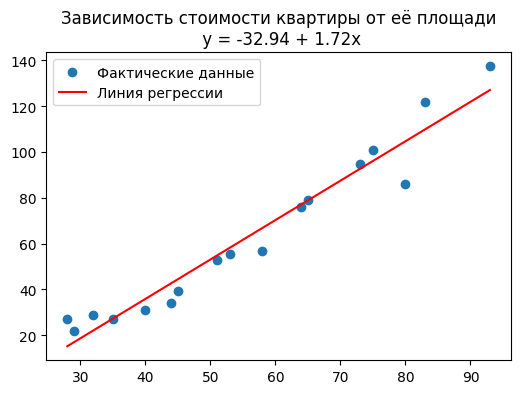

In [427]:
a , b = model.params
plt.figure(figsize=(6,4))
plt.scatter(df["x"], df["y"], label="Фактические данные")
plt.plot(x_grid, y_hat_grid, color="red", label="Линия регрессии")
plt.title(f"Зависимость стоимости квартиры от её площади\n y = {a:.2f} + {b:.2f}x")
plt.legend()
plt.show()

In [428]:
r_xy = np.corrcoef(df["x"], df["y"])[0, 1]
print(f"Коэффициент Пирсона: {r_xy:.4f}")
print(f"Коэффициент детерминации: {pow(r_xy, 2):.4f}")

Коэффициент Пирсона: 0.9732
Коэффициент детерминации: 0.9472


In [429]:
df["e"] = df["y"] - df["y^"]
df["|e|"] = df["e"].abs()
df

,x,y,y^,e,|e|
0,28,27.0,15.222451,11.777549,11.777549
1,29,22.0,16.942617,5.057383,5.057383
2,32,29.0,22.103115,6.896885,6.896885
3,35,27.0,27.263613,-0.263613,0.263613
4,40,31.0,35.864442,-4.864442,4.864442
5,44,34.0,42.745106,-8.745106,8.745106
6,45,39.3,44.465272,-5.165272,5.165272
7,51,52.7,54.786268,-2.086268,2.086268
8,53,55.4,58.226600,-2.826600,2.826600
9,58,57.0,66.827430,-9.827430,9.827430


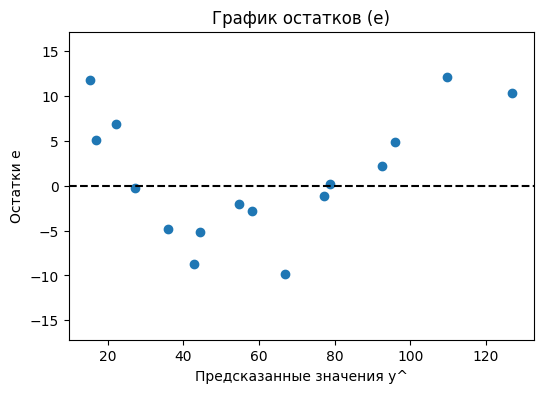

In [430]:
limit = abs(max(df["e"].min(), df["e"].max())) + 5

plt.figure(figsize=(6,4))
plt.scatter(df["y^"], df["e"])
plt.axhline(0, color="black", linestyle="--")
plt.title("График остатков (e)")
plt.xlabel("Предсказанные значения y^")
plt.ylabel("Остатки e")
plt.ylim(- limit, limit )
plt.show()


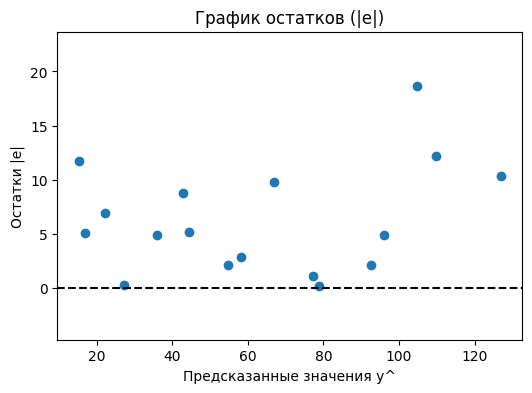

In [431]:
limit = df["|e|"].max() + 5

plt.figure(figsize=(6,4))
plt.scatter(df["y^"], df["|e|"])
plt.axhline(0, color="black", linestyle="--")
plt.title("График остатков (|e|)")
plt.xlabel("Предсказанные значения y^")
plt.ylabel("Остатки |e|")
plt.ylim(df["|e|"].min() - 5, limit )
plt.show()


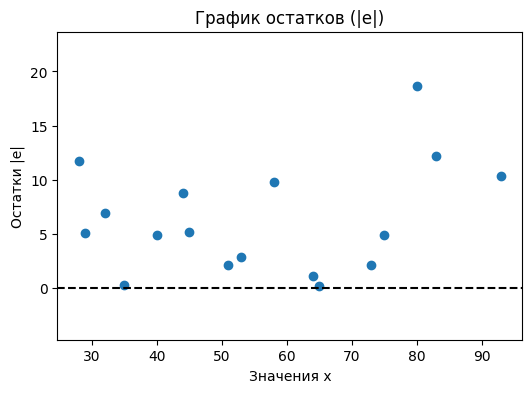

In [432]:
limit = df["|e|"].max() + 5

plt.figure(figsize=(6,4))
plt.scatter(df["x"], df["|e|"])
plt.axhline(0, color="black", linestyle="--")
plt.title("График остатков (|e|)")
plt.xlabel("Значения x")
plt.ylabel("Остатки |e|")
plt.ylim(df["|e|"].min() - 5, limit )
plt.show()


# 📘 Смысл критерия Дарбина–Уотсона
Он проверяет наличие автокорреляции остатков (обычно — первой степени, то есть связи между eₜ и eₜ₋₁).

<img src="/Users/artemsaman/Documents/Эконометрика/Python_econometrics/22_10_2025/DW.png" width="650">

| DW значение | Интерпретация                                             |
|--------------|----------------------------------------------------------|
| **≈ 2.0**    | автокорреляции нет ✅                                    |
| **< 2.0**    | положительная автокорреляция (остатки похожи по знаку) ⚠️ |
| **> 2.0**    | отрицательная автокорреляция (остатки чередуются) ⚠️      |
| **≈ 0**      | сильная положительная автокорреляция ❌                   |
| **≈ 4**      | сильная отрицательная автокорреляция ❌                   |


In [433]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print(f"Durbin–Watson = {dw:.4f}")


Durbin–Watson = 1.6705


In [434]:
import numpy as np

e = model.resid                     # остатки модели
dw = np.sum(np.diff(e)**2) / np.sum(e**2)
print(f"Durbin–Watson = {dw:.4f}")

Durbin–Watson = 1.6705


Коэффициент Дарбина–Уотсона составляет DW = 1.67, 

что находится в допустимом диапазоне (1.5–2.5).

Следовательно, существенной автокорреляции остатков не наблюдается, 

и предпосылка классической модели регрессии о независимости ошибок выполняется.

Модель зависимости стоимости квартиры (y) от площади квартиры 

(x) можно считать статистически корректной по данному критерию.